# Исследование рынка видеоигр

Перед нами данные до 2016 года и мы планируем кампанию на 2017-й. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

**Цель проекта:**

- На основе данных выявить закономерности, определяющие успешность игр.

**В ходе анализа необходимо проверить две гипотезы:**

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

- Средние пользовательские рейтинги жанров Action и Sports разные.

**Исследование позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.**

**Ход исследования:**

1. Обзор данных;
2. Предобработка данных;
3. Исследовательский анализ данных;
4. Различия в регионах;
5. Проверка гипотез.

**Описание данных**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales — продажи в Европе (миллионы долларов)
- JP_sales — продажи в Японии (миллионы долларов)
- Other_sales — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Обзор данных

In [1]:
# импорт библиотек
from scipy import stats as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# чтение файла с данными
try:
    games = pd.read_csv('/datasets/games.csv')
except:
    games = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
# обзор датафрейма games
games.info()
display(games)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Мы видим, что датафрейм содержит одиннадцать столбцов. Согласно документации:

- Name - название игры
- Platform - платформа
- Year_of_Release - год выпуска
- Genre - жанр игры
- NA_sales - продажи в Северной Америке (млн. проданных копий)
- EU_sales - продажи в Европе (млн. проданных копий)
- JP_sales - продажи в Японии (млн. проданных копий)
- Other_sales - продажи в других странах (млн. проданных копий)
- Critic_Score - оценка критиков (максимум 100 баллов)
- User_score - оценка пользователей (максимум 10 баллов)
- Rating - возрастной рейтинг организации ESRB (англ. Entertainment Spftware Rating Board)

**Вывод**

Мы ознакомились с таблицей. При этом заметно, что тип данных в столбцах не всегда корректный (например, пользовательский рейтинг с типом object или год релиза с типом float). Так же нужно проверить данные на наличие дубликатов, по возможности, заполнить пропуски и сгруппировать данные для бОльшей наглядности.

Приступаем к предобработке данных.

### Предобработка данных

**Заменим названия столбцов (приведём к нижнему регистру):**

In [4]:
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**Пропуски, замена типа данных**

In [5]:
# в столбце name имеются пропуски, эти строчки придется удалить
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [6]:
# удаляем 2 строки с пропусками
games = games.dropna(subset=['name']).reset_index(drop=True)

In [7]:
# кол-во пропусков в столбце year_of_release
display(games['year_of_release'].isna().sum())
# доля пропусков в столбце year_of_release
games['year_of_release'].isna().sum()/ len(games['year_of_release'])

269

0.016095255190570215

In [8]:
# cтроки с пропущенным годом релиза удалим, их около 1.6% от всего объема данных
games = games.dropna(subset=['year_of_release']).reset_index(drop=True)

In [9]:
# меняем тип данных на цельночисленный
games['year_of_release'] = games['year_of_release'].astype('int')

Посмотрим critic_scores, users_scores

In [10]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [11]:
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Мы видим значение tbd(англ. To Be Determined, то есть "Будет определено") в столбце user_score. Для приведения столбца к типу float заменяем его пропусками.

In [12]:
games.user_score.replace('tbd', np.nan, inplace=True)
games['user_score'] = games['user_score'].astype('float')

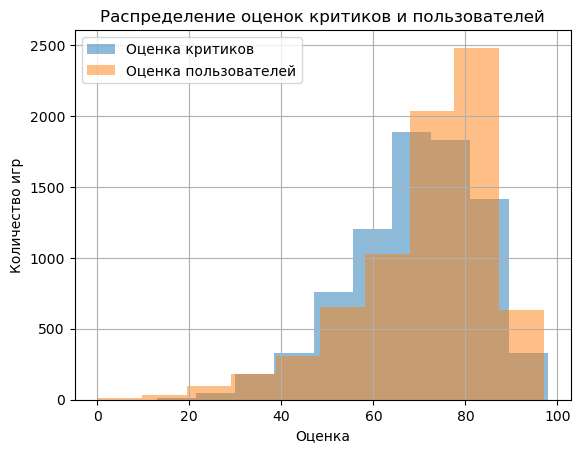

In [13]:
fig, ax = plt.subplots()
games.critic_score.hist(ax=ax, label='Оценка критиков',alpha=0.5)
(games.user_score*10).hist(ax=ax, label='Оценка пользователей', alpha=0.5)
ax.legend(loc='upper left')
ax.set_xlabel('Оценка')
ax.set_ylabel('Количество игр')
ax.set_title('Распределение оценок критиков и пользователей')
plt.alpha=0.5
plt.show()

В общем и целом, оценки сопадают. При это заметно, что разброс оценок у пользователей шире. Кажется логичным, что профессиональные критики не могут позволить себе впадать в крайность.

In [14]:
# посмотрим возрастной рейтинг организации ESRB
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [15]:
# пропуски в рейтинге ESRB заменим на аббревиатуру ND - не определен, устаревшую аббревиатуру "K-A" заменим на современное обозначение "E"
games['rating'] = games['rating'].fillna(value='ND')
games['rating'] = games['rating'].replace('K-A', 'E')

**Дубликаты**

Найдем дубликаты по трем столбцам name, platform, year_of_release и удалим их.

In [16]:
display(games.loc[games.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)])
# удаляем дубль
games = games.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
600,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
15969,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


**Добавим к таблице столбец total_sales с суммарными продажами во всех регионах**

In [17]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,ND,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,ND,31.38


In [18]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


**Вывод**

Мы привели имена столбцов к единому стилю, привели данные в столбце year_of_release к целочисленному типу и избавились от записей с критичными пропусками в данных - названием игры и годом выпуска, а также добавили новый столбец - подсчитали суммарный объем продаж во всех регионах. Всего из 16715 строк осталось 16443.

### Исследовательский анализ данных

**Выпуск игр в разные годы**

Посмотрим, какое количество релизов было в разные годы, и построим график.

In [19]:
games.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     652
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

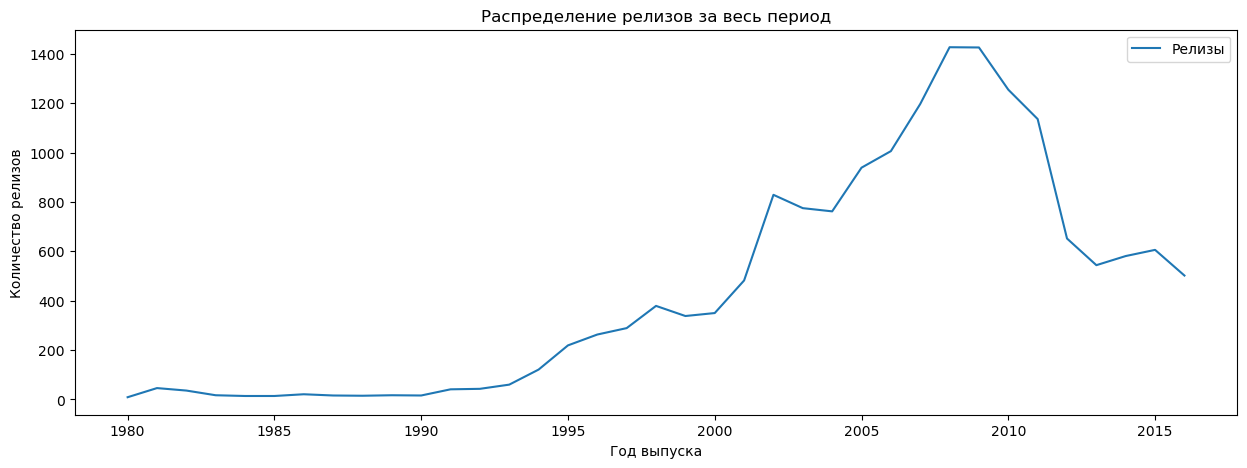

In [20]:
plt.figure(figsize=(15,5))
plt.plot(games.groupby('year_of_release')['name'].count(), label='Релизы')
plt.legend()
plt.xlabel('Год выпуска')
plt.ylabel('Количество релизов')
plt.title('Распределение релизов за весь период')
plt.show() 

In [21]:
# посмотрим на топ годов 
games.groupby('year_of_release')['name'].count().sort_values(ascending=False).head(10)

year_of_release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
Name: name, dtype: int64

In [22]:
# посмотрим на хвост годов 
games.groupby('year_of_release')['name'].count().sort_values(ascending=False).tail(15)

year_of_release
1994    121
1993     60
1981     46
1992     43
1991     41
1982     36
1986     21
1989     17
1983     17
1990     16
1987     16
1988     15
1985     14
1984     14
1980      9
Name: name, dtype: int64

В 2000-х годах наступает настоящий расцвет видеоигр, и количество релизов достигает максимума - более чем 1400 в 2008-2009 
годах. До 1994 года количество релизов в год не превышало 100, и эти данные сложно назвать актуальными. Взлет начинается в 1994 году, возможно, с удешевлением гаджетов и их повсеместным распространением.

**Продажи по платформам**

In [23]:
# определим топ 10 платформ по кол-ву продаж
games.groupby('platform').sum()[['total_sales']].reset_index().sort_values(
    by='total_sales', ascending=False
).head(10)

,platform,total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.33
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


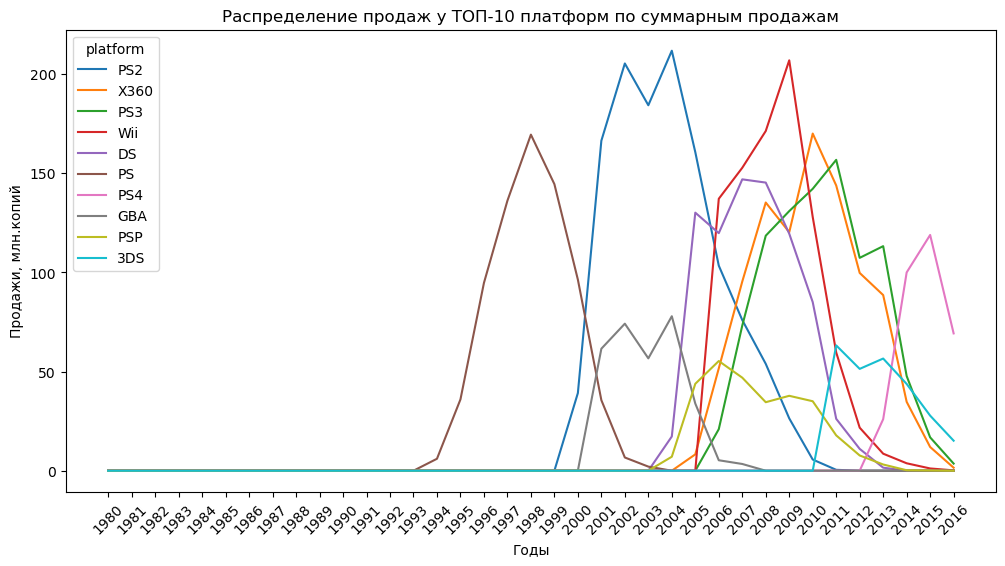

In [24]:
# На примере платформ с наибольшими суммарными продажами построим распределение продаж по годам.
data_top_sales = games.pivot_table(
    index = 'year_of_release', 
    columns = 'platform',
    values = 'total_sales', 
    aggfunc = 'sum'
    ).fillna(0)

data_top_sales = data_top_sales[['PS2', 'X360','PS3','Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']]
ax = data_top_sales.plot(xticks=data_top_sales.index,figsize=(12,6))
plt.xticks(rotation = 45)
ylab = ax.set_ylabel('Продажи, млн.копий')
xlab = ax.set_xlabel('Годы')
plt.title('Распределение продаж у ТОП-10 платформ по суммарным продажам')
plt.show()    

In [25]:
data_top_sales

platform,PS2,X360,PS3,Wii,DS,PS,PS4,GBA,PSP,3DS
year_of_release,,,,,,,,,,
1980,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1981,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1982,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1983,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1984,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1985,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00
1986,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1987,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1988,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Заметно, что цикл появления новых и исчезновения старых платформ составляет примерно 10-12 лет.

**Посмотрим данные за 2014-2016 гг., чтобы понять, какие платформы окажутся в лидерах.**

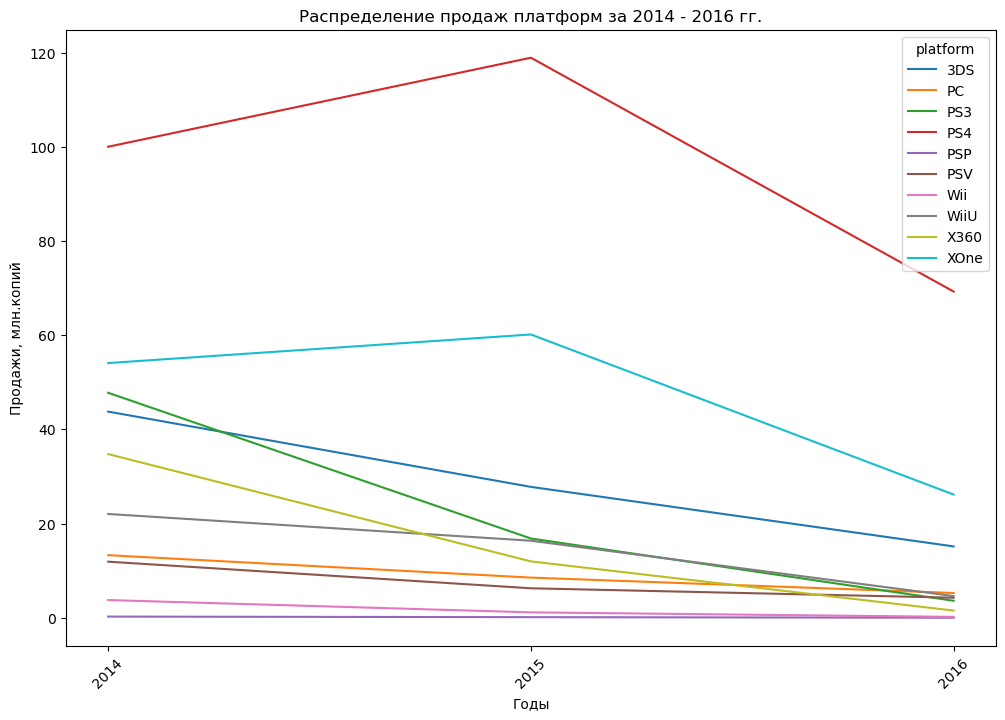

In [26]:
data_sales = games.query('year_of_release >= 2014').pivot_table(
    index = 'year_of_release', 
    columns = 'platform',
    values = 'total_sales', 
    aggfunc = 'sum'
    ).fillna(0)

ax = data_sales.plot(xticks=data_sales.index,figsize=(12,8))
plt.xticks(rotation = 45)
ylab = ax.set_ylabel('Продажи, млн.копий')
xlab = ax.set_xlabel('Годы')
plt.title('Распределение продаж платформ за 2014 - 2016 гг.')
plt.show() 

Итак, самыми потенциально прибыльными платформами являются Sony PlayStation 4, Xbox One и Nintendo 3DS. Какое-то время будут актуальны игры для платформ PC, WiiU и PCV. Остальные платформы уже упали в продажах и ждать второго дыхания в 2017 году не стоит. Конечно, на графике виден спад абсолютно всех продаж к 2016 году, но возможно это связано с тем, что просто нет полных данных за этот период.

**Анализ продаж перспективных платформ**

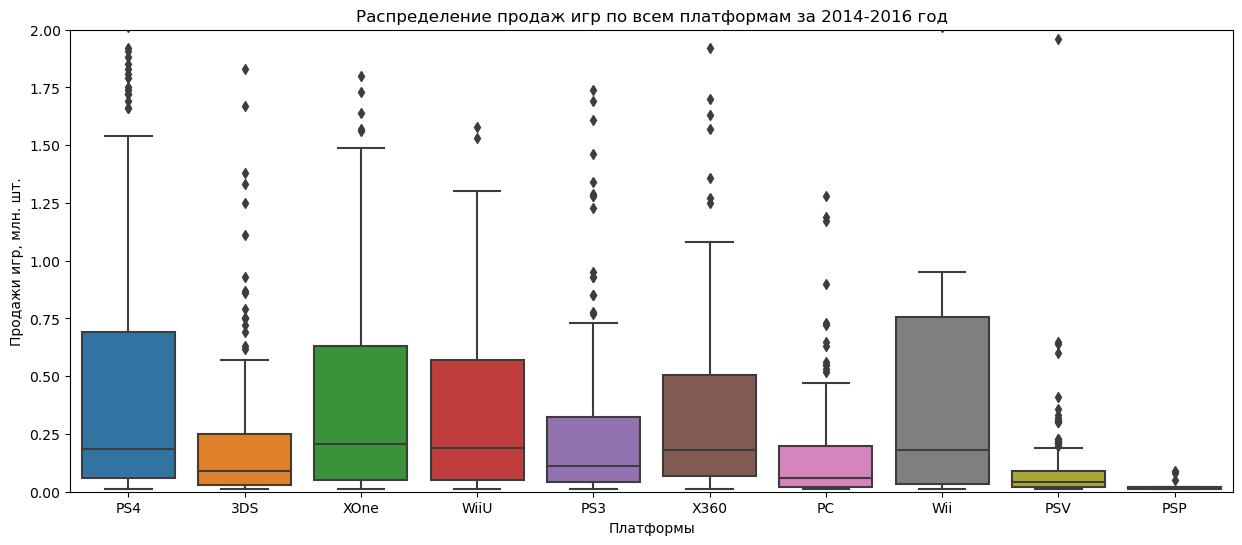

In [27]:
# построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам
games_top = games.query('year_of_release >= 2014')
plt.figure(figsize=(15,6))

ax = sns.boxplot(x='platform', y='total_sales', data=games_top)
ax.set_ylim(0, 2)
ax.set_ylabel('Продажи игр, млн. шт.')
ax.set_xlabel('Платформы')
ax.set_title('Распределение продаж игр по всем платформам за 2014-2016 год')
plt.show()

Медианные продажи по каждой из платформ заметно меньше 1 млн, но выбросы показывают, что часто у платформ случаются супер-хиты, приносящие миллионы - доля таких успешных проектов выше всего у PlayStation 4 и XBox one. 

In [28]:
games_top.pivot_table(index='platform', values='total_sales', aggfunc='sum').nlargest(10, 'total_sales')

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


К лидерам по продажам за актуальный период (2014-2016 гг.) относятся PS4, XOne и 3DS. При этом к лидерам по средним продажам относятся WiiU, PS3, PC и X360.

**Влияние отзывов критиков и пользователей**

Для примера выберем одну из популярных платформ - PlayStation 4

In [29]:
# подсчитаем коэффициент корреляции между глобальными продажами и оценками критиков для платформы PS4
games_top.query('platform == "PS4"')['total_sales'].corr(games_top.query('platform == "PS4"')['critic_score'])

0.4026614106810411

In [30]:
# подсчитаем коэффициент корреляции между глобальными продажами и оценками пользователей для платформы PS4
games_top.query('platform == "PS4"')['total_sales'].corr(games_top.query('platform == "PS4"')['user_score'])

-0.040131589472697266

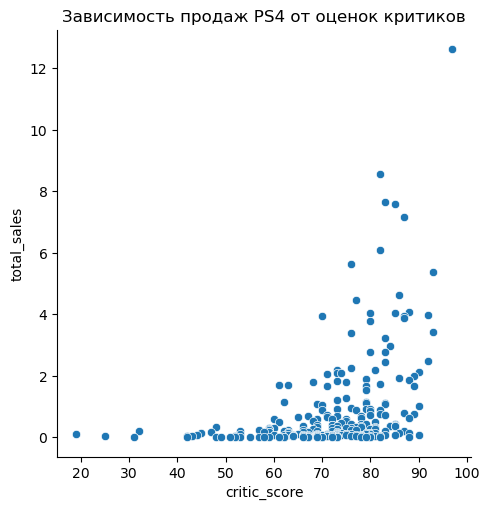

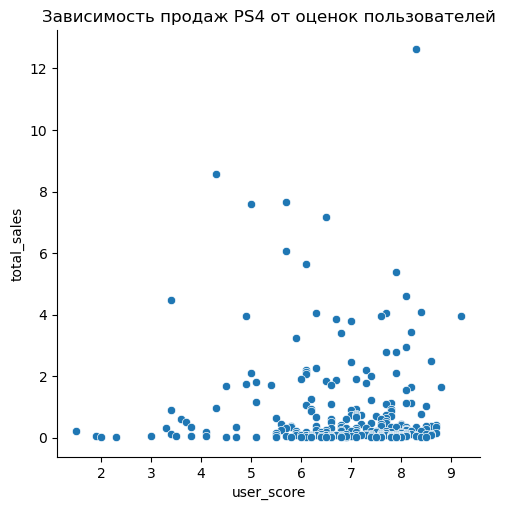

In [31]:
# визуализируем эти значения при помощи графика рассеивания
sns.relplot(kind='scatter', x='critic_score', y='total_sales',data=games_top.query('platform == "PS4"'))
plt.title('Зависимость продаж PS4 от оценок критиков')
sns.relplot(kind='scatter', x='user_score', y='total_sales',data=games_top.query('platform == "PS4"'))
plt.title('Зависимость продаж PS4 от оценок пользователей')
plt.show()

Линейная корреляция между оценками критиков и продажами умеренная, а между продажами и оценками пользователей корреляция слабая.

Рассмотрим влияние отзывов пользователей и критиков на продажи игр на примере платформ XOne и PS3

In [32]:
# подсчитаем коэффициент корреляции между глобальными продажами и оценками критиков для платформы XOne
games_top.query('platform == "XOne"')['total_sales'].corr(games_top.query('platform == "XOne"')['critic_score'])

0.428676943703332

In [33]:
# подсчитаем коэффициент корреляции между глобальными продажами и оценками пользователей для платформы XOne
games_top.query('platform == "XOne"')['total_sales'].corr(games_top.query('platform == "XOne"')['user_score'])

-0.07038392806475811

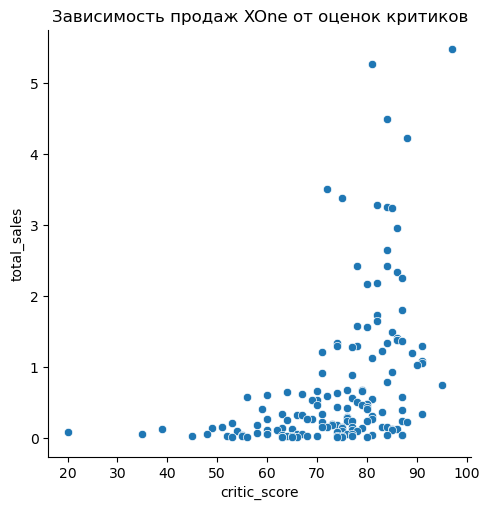

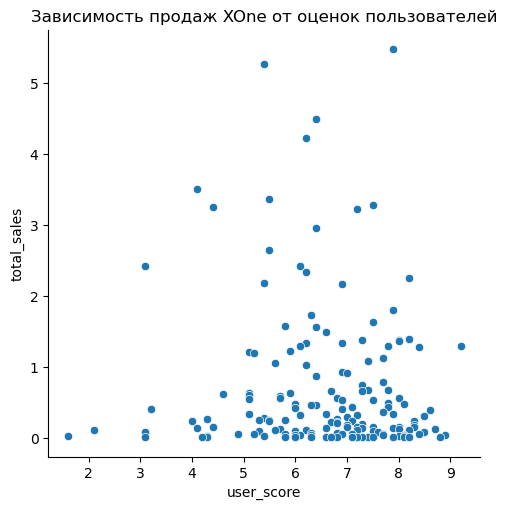

In [34]:
# визуализируем эти значения при помощи графика рассеивания
sns.relplot(kind='scatter', x='critic_score', y='total_sales',data=games_top.query('platform == "XOne"'))
plt.title('Зависимость продаж XOne от оценок критиков')
sns.relplot(kind='scatter', x='user_score', y='total_sales',data=games_top.query('platform == "XOne"'))
plt.title('Зависимость продаж XOne от оценок пользователей')
plt.show()

Аналогично с приставкой PS4.
Линейная корреляция между оценками критиков и продажами умеренная, а между продажами и оценками пользователей корреляция слабая.

In [35]:
# подсчитаем коэффициент корреляции между глобальными продажами и оценками критиков для платформы PS3
games_top.query('platform == "PS3"')['total_sales'].corr(games_top.query('platform == "PS3"')['critic_score'])

0.4465746049319071

In [36]:
# подсчитаем коэффициент корреляции между глобальными продажами и оценками пользователей для платформы PS3
games_top.query('platform == "PS3"')['total_sales'].corr(games_top.query('platform == "PS3"')['user_score'])

-0.16676141347662102

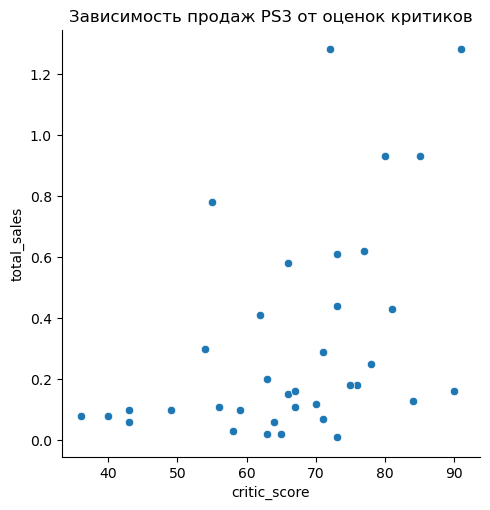

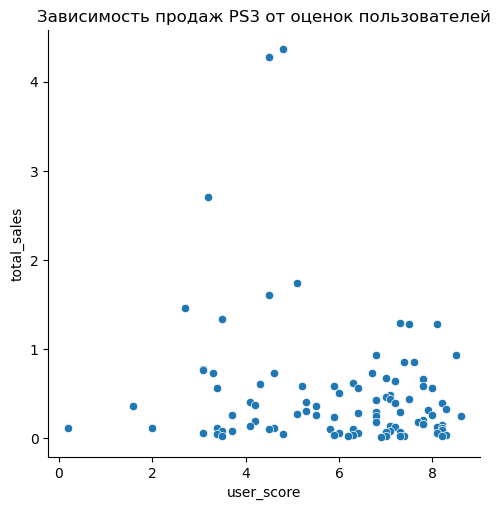

In [37]:
# визуализируем эти значения при помощи графика рассеивания
sns.relplot(kind='scatter', x='critic_score', y='total_sales',data=games_top.query('platform == "PS3"'))
plt.title('Зависимость продаж PS3 от оценок критиков')
sns.relplot(kind='scatter', x='user_score', y='total_sales',data=games_top.query('platform == "PS3"'))
plt.title('Зависимость продаж PS3 от оценок пользователей')
plt.show()

Вывод для платформы PS3 аналогичен с другими. Линейная корреляция между оценками критиков и продажами умеренная, а между продажами и оценками пользователей корреляция слабая.

Следовательно, для всех платформ характерно среднее влияние отзывов критиков на продажи и отсутствие влияния отзывов пользователей.

**Теперь посмотрим распределение игр по жанрам**

Есть ли наиболее прибыльные (или наоборот) жанры? Анализ будем проводить на примере перспективных платформ за последние 3 года.

In [38]:
games_top['genre'].value_counts()

Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: genre, dtype: int64

In [39]:
games_top.pivot_table(
    index = 'genre',
    columns = 'platform',
    values = 'total_sales',
    aggfunc='sum',
    margins=True
).fillna(0).sort_values(
    by='All', 
    ascending=False
)

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne,All
genre,,,,,,,,,,,
All,86.68,27.05,68.18,288.15,0.36,22.40,5.07,42.98,48.22,140.36,729.45
Action,22.06,5.34,18.10,91.62,0.20,7.47,1.19,9.99,12.33,31.06,199.36
Shooter,0.00,5.79,12.17,78.46,0.00,0.64,0.00,4.83,13.66,55.39,170.94
Sports,1.32,0.93,17.47,50.01,0.09,1.20,0.56,0.82,13.40,23.68,109.48
Role-Playing,40.02,4.87,6.63,28.99,0.00,6.10,0.00,1.52,2.76,10.55,101.44
Misc,3.85,0.05,6.69,7.77,0.02,3.43,3.14,4.59,1.27,6.74,37.55
Fighting,8.10,0.10,2.89,7.73,0.00,0.69,0.00,5.88,0.66,2.17,28.22
Racing,0.00,0.64,1.00,10.16,0.00,0.10,0.00,7.09,1.64,6.89,27.52
Platform,3.98,0.06,0.76,5.42,0.00,0.19,0.00,6.87,0.19,0.62,18.09


Самыми продаваемыми жанрами в играх являются:
- Action, Shooter и Sports.

А вот самые низкие продажи у игр в жанрах:
- Simulation, Strategy и Puzzle.

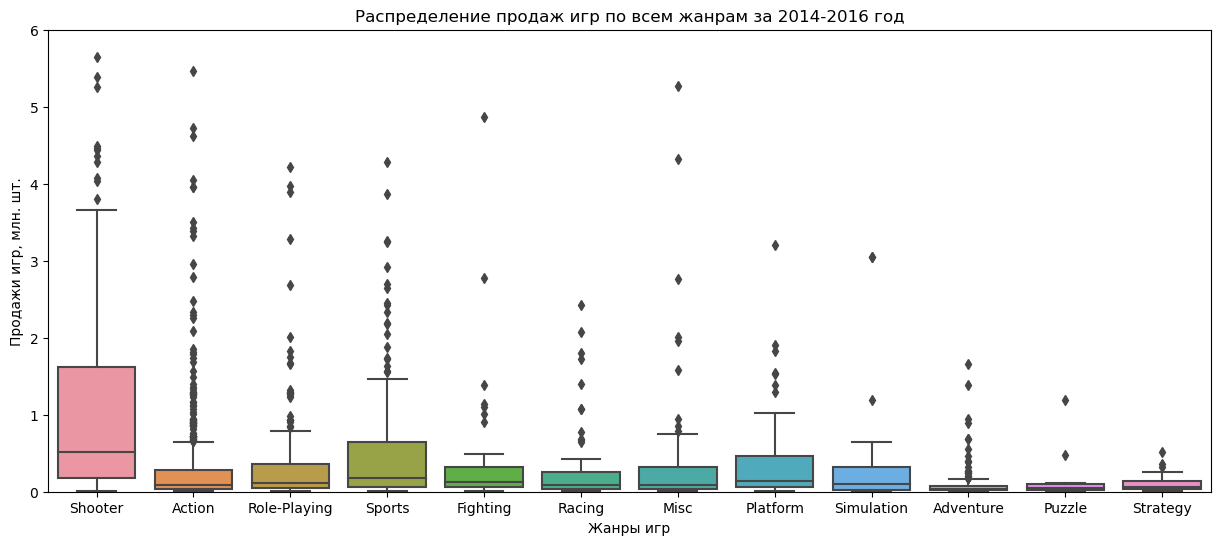

In [40]:
# посмотрим даиграмму размаха (с выбросами)
plt.figure(figsize=(15,6))

ax = sns.boxplot(x='genre', y='total_sales', data=games_top)
ax.set_ylim(0, 6)
ax.set_ylabel('Продажи игр, млн. шт.')
ax.set_xlabel('Жанры игр')
ax.set_title('Распределение продаж игр по всем жанрам за 2014-2016 год')
plt.show()

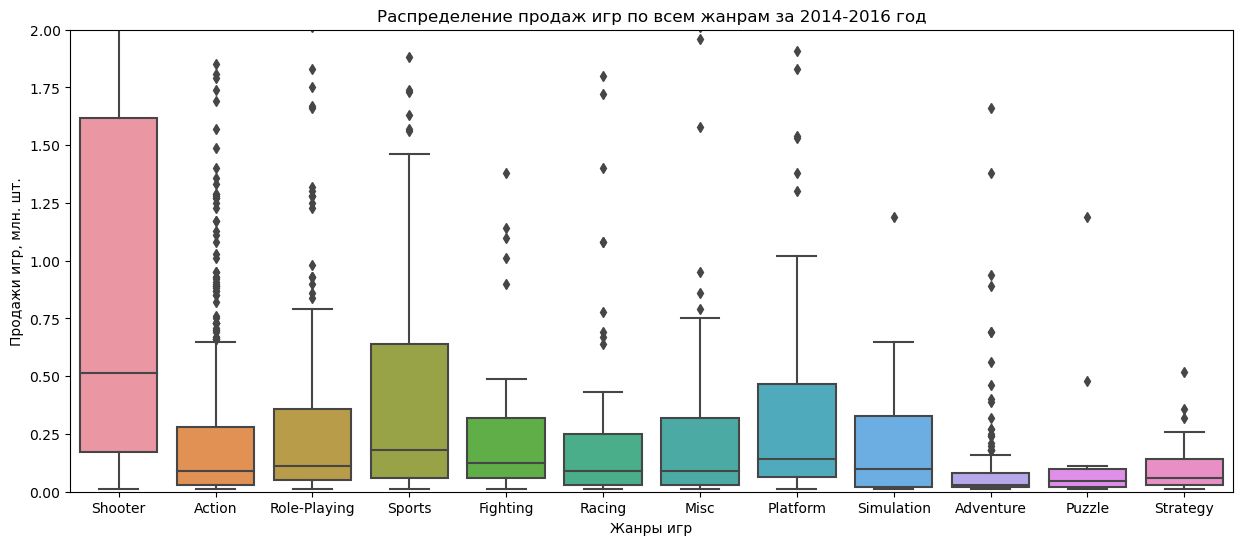

In [41]:
# посмотрим даиграмму размаха (без выбросов)
plt.figure(figsize=(15,6))

ax = sns.boxplot(x='genre', y='total_sales', data=games_top)
ax.set_ylim(0, 2)
ax.set_ylabel('Продажи игр, млн. шт.')
ax.set_xlabel('Жанры игр')
ax.set_title('Распределение продаж игр по всем жанрам за 2014-2016 год')
plt.show()

Как мы видим, shooter по средним продажам лидирует по сравнению с остальными жанрами игр, а action, напротив, по этому критерию отстает, однако, является в целом популярным жанром из-за наибольшего объема продаж. Игры-стратегии (Strategy) и игры-головоломки (puzzle), как правило, не пользуются большой популярностью: их средние продажи одни из самых низких среди всех жанров. 

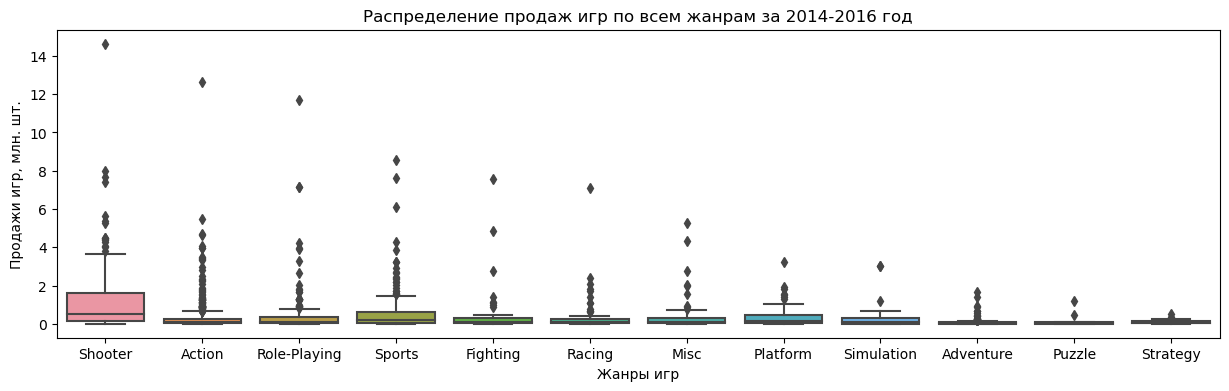

In [42]:
# check
plt.figure(figsize=(15,4))

ax = sns.boxplot(x='genre', y='total_sales', data=games_top)
# ax.set_ylim(0, 6)
ax.set_ylabel('Продажи игр, млн. шт.')
ax.set_xlabel('Жанры игр')
ax.set_title('Распределение продаж игр по всем жанрам за 2014-2016 год')
plt.show()

**Вывод:**

- в среднем жизненный цикл платформы составляет около 10-12 лет;
- самыми потенциально прибыльными платформами являются Sony PlayStation 4 и Xbox One;
- оценка критиков влияет на продажи больше, чем оценка пользователей;
- наиболее популярными жанрами являются Action, Shooter, Sports и Role-Playing.

### Различия в регионах

**Самые популярные платформы (топ-5)**

In [43]:
games_top.pivot_table(
    index = 'platform',
    values = ['na_sales', 'eu_sales', 'jp_sales'],
    aggfunc =  'sum'
).apply(
    lambda col: col / col.sum(), 
    axis=0
).style.format("{:.1%}")

,eu_sales,jp_sales,na_sales
platform,,,
3DS,6.0%,47.5%,8.0%
PC,6.6%,0.0%,2.5%
PS3,9.4%,12.1%,7.8%
PS4,48.0%,16.1%,34.7%
PSP,0.0%,0.4%,0.0%
PSV,1.3%,15.6%,0.9%
Wii,1.0%,0.0%,0.7%
WiiU,4.9%,7.9%,6.8%
X360,5.7%,0.1%,10.0%


In [44]:
# создадим столбцы, где будут данные топ-5 платформ и "другие"
games_top['platform_ea'] = games_top['platform']
games_top['platform_jp'] = games_top['platform']
games_top['platform_na'] = games_top['platform']

In [45]:
# переименуем названия платформ в "другие", которые не вошли в топ-5
games_top['platform_ea'] = games_top['platform_ea'].replace('X360', 'Other')
games_top['platform_ea'] = games_top['platform_ea'].replace('WiiU', 'Other')
games_top['platform_ea'] = games_top['platform_ea'].replace('PSV', 'Other')
games_top['platform_ea'] = games_top['platform_ea'].replace('Wii', 'Other')
games_top['platform_ea'] = games_top['platform_ea'].replace('PSP', 'Other')
games_top['platform_jp'] = games_top['platform_jp'].replace('PSP', 'Other')
games_top['platform_jp'] = games_top['platform_jp'].replace('XOne', 'Other')
games_top['platform_jp'] = games_top['platform_jp'].replace('X360', 'Other')
games_top['platform_jp'] = games_top['platform_jp'].replace('PC', 'Other')
games_top['platform_jp'] = games_top['platform_jp'].replace('Wii', 'Other')
games_top['platform_na'] = games_top['platform_na'].replace('WiiU', 'Other')
games_top['platform_na'] = games_top['platform_na'].replace('PC', 'Other')
games_top['platform_na'] = games_top['platform_na'].replace('PSV', 'Other')
games_top['platform_na'] = games_top['platform_na'].replace('Wii', 'Other')
games_top['platform_na'] = games_top['platform_na'].replace('PSP', 'Other')

In [46]:
# check
# import pandas as pd
df_app = pd.DataFrame([['ps',1,2,3],
                   ['xone',3,5,6],
                   ['pc',8,9,10],
                   ['ps3',1,7,3],
                   ['ps4',5,2,3]], columns=['platform', 'eu','jp','na'])
display(df_app)

df_other = df_app[3:]
df_other = df_other.append({'platform': 'Other', 'eu': df_app['eu'].sum()-df_app['eu'][3:].sum(),
                  'jp': df_app['jp'].sum()-df_app['jp'][3:].sum(),
                  'na': df_app['na'].sum()-df_app['na'][3:].sum()}, ignore_index = True)
df_other

,platform,eu,jp,na
0,ps,1,2,3
1,xone,3,5,6
2,pc,8,9,10
3,ps3,1,7,3
4,ps4,5,2,3


,platform,eu,jp,na
0,ps3,1,7,3
1,ps4,5,2,3
2,Other,12,16,19


#### check

In [47]:
platform_eu_sales = games_top.pivot_table(index='platform_ea', values='eu_sales', aggfunc=['sum'])
platform_jp_sales = games_top.pivot_table(index='platform_jp', values='jp_sales', aggfunc=['sum'])
platform_na_sales = games_top.pivot_table(index='platform_na', values='na_sales', aggfunc=['sum'])

<Axes: title={'center': 'Популярность платформ в Cеверной Америке'}>

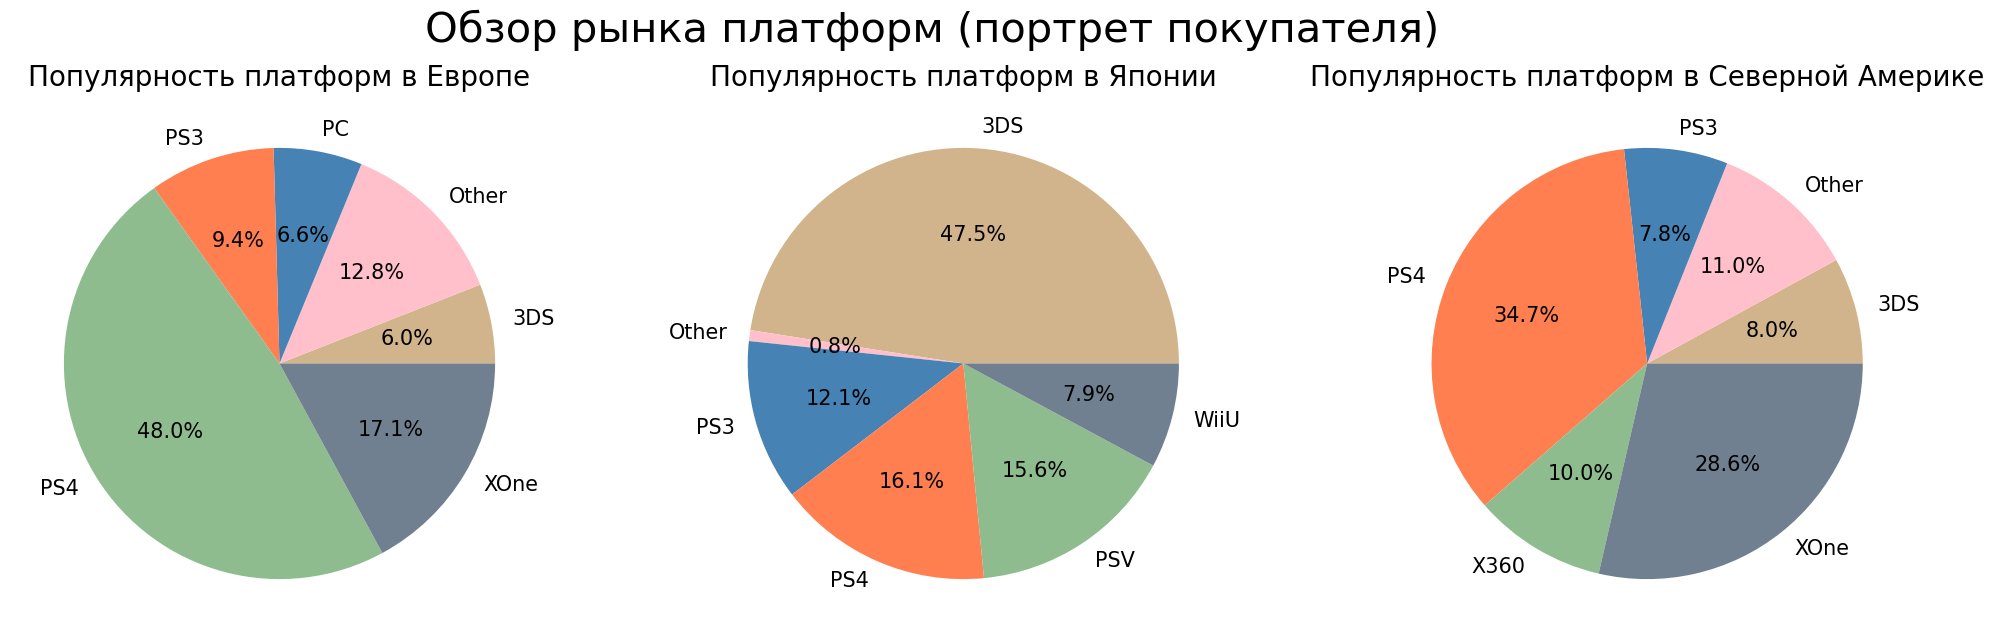

In [48]:
# построим круговые диаграммы топ-5 платформ
colors_pie = ['tan', 'pink', 'steelblue', 'coral', 'darkseagreen', 'slategrey', 'maroon', 'Cornsilk', 'DarkSlateGrey']
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,ncols=3, figsize=(25, 7))
fig.suptitle('Обзор рынка платформ (портрет покупателя)', y = 1, fontsize = 30)
plt.rc('font', size=15) 
plt.rc('axes', titlesize=20) 
plt.ylabel("")
platform_eu_sales.plot(kind='pie', y='sum', autopct='%1.1f%%', ax=ax0, title='Популярность платформ в Европе', ylabel=(""), legend=None, colors=colors_pie)
platform_jp_sales.plot(kind='pie', y='sum', autopct='%1.1f%%', ax=ax1, title='Популярность платформ в Японии', ylabel=(""), legend=None, colors=colors_pie)
platform_na_sales.plot(kind='pie', y='sum', autopct='%1.1f%%', ax=ax2, title='Популярность платформ в Cеверной Америке', ylabel=(""), legend=None, colors=colors_pie)

Мы видим разницу в предпочтениях визуально: европейские пользователи предпочитают Sony PlayStation (более 48% рынка), американские - Sony PlayStation 4 (35%) и XOne (более 28% рынка), японские геймеры голосуют деньгами за Nintendo 3DS (около 48%).

**Самые популярные жанры (топ-5)**

In [49]:
games_top.pivot_table(
    index = 'genre',
    values = ['na_sales', 'eu_sales', 'jp_sales'],
    aggfunc =  'sum'
).apply(
    lambda col: col / col.sum(), 
    axis=0
).style.format("{:.1%}")

,eu_sales,jp_sales,na_sales
genre,,,
Action,27.6%,31.8%,25.5%
Adventure,2.4%,3.9%,2.0%
Fighting,2.5%,6.8%,4.4%
Misc,4.8%,6.0%,5.3%
Platform,2.5%,2.9%,2.4%
Puzzle,0.2%,1.0%,0.2%
Racing,5.2%,1.9%,3.1%
Role-Playing,10.4%,33.5%,11.8%
Shooter,24.2%,5.2%,27.8%


In [50]:
# создадим столбцы, где будут данные топ-5 жанров и "другие"
games_top['genre_ea'] = games_top['genre']
games_top['genre_jp'] = games_top['genre']
games_top['genre_na'] = games_top['genre']

In [51]:
# переименуем названия жанров в "другие", которые не вошли в топ-5
games_top['genre_ea'] = games_top['genre_ea'].replace('Misc', 'Other')
games_top['genre_ea'] = games_top['genre_ea'].replace('Simulation', 'Other')
games_top['genre_ea'] = games_top['genre_ea'].replace('Platform', 'Other')
games_top['genre_ea'] = games_top['genre_ea'].replace('Fighting', 'Other')
games_top['genre_ea'] = games_top['genre_ea'].replace('Adventure', 'Other')
games_top['genre_ea'] = games_top['genre_ea'].replace('Strategy', 'Other')
games_top['genre_ea'] = games_top['genre_ea'].replace('Puzzle', 'Other')
games_top['genre_jp'] = games_top['genre_jp'].replace('Adventure', 'Other')
games_top['genre_jp'] = games_top['genre_jp'].replace('Sports', 'Other')
games_top['genre_jp'] = games_top['genre_jp'].replace('Platform', 'Other')
games_top['genre_jp'] = games_top['genre_jp'].replace('Simulation', 'Other')
games_top['genre_jp'] = games_top['genre_jp'].replace('Racing', 'Other')
games_top['genre_jp'] = games_top['genre_jp'].replace('Strategy', 'Other')
games_top['genre_jp'] = games_top['genre_jp'].replace('Puzzle', 'Other')
games_top['genre_na'] = games_top['genre_na'].replace('Fighting', 'Other')
games_top['genre_na'] = games_top['genre_na'].replace('Racing', 'Other')
games_top['genre_na'] = games_top['genre_na'].replace('Platform', 'Other')
games_top['genre_na'] = games_top['genre_na'].replace('Adventure', 'Other')
games_top['genre_na'] = games_top['genre_na'].replace('Simulation', 'Other')
games_top['genre_na'] = games_top['genre_na'].replace('Strategy', 'Other')
games_top['genre_na'] = games_top['genre_na'].replace('Puzzle', 'Other')

In [52]:
genre_eu_sales = games_top.pivot_table(index='genre_ea', values='eu_sales', aggfunc=['sum'])
genre_jp_sales = games_top.pivot_table(index='genre_jp', values='jp_sales', aggfunc=['sum'])
genre_na_sales = games_top.pivot_table(index='genre_na', values='na_sales', aggfunc=['sum'])

In [53]:
genre_eu_sales

,sum
,eu_sales
genre_ea,
Action,74.68
Other,42.45
Racing,14.13
Role-Playing,28.17
Shooter,65.52
Sports,45.73


<Axes: title={'center': 'Популярность жанров в Cеверной Америке'}>

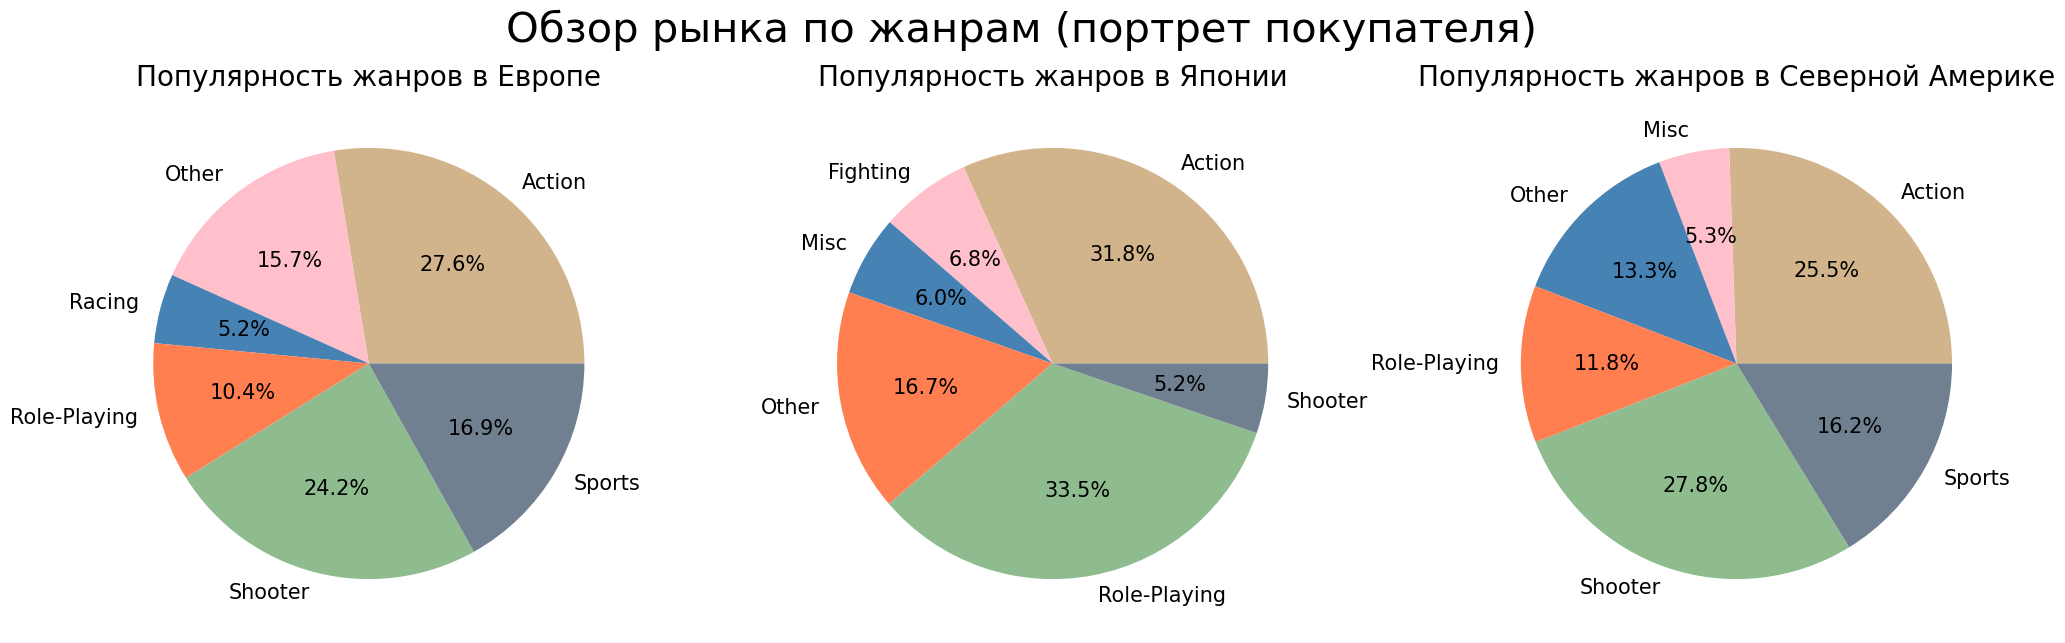

In [54]:
# построим круговые диаграммы
colors_pie = ['tan', 'pink', 'steelblue', 'coral', 'darkseagreen', 'slategrey', 'maroon', 'Cornsilk', 'DarkSlateGrey']
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,ncols=3, figsize=(25, 7))
fig.suptitle('Обзор рынка по жанрам (портрет покупателя)', y = 1, fontsize = 30)
plt.rc('font', size=15) 
plt.rc('axes', titlesize=20) 
genre_eu_sales.plot(kind='pie', y='sum', autopct='%1.1f%%', ax=ax0, title='Популярность жанров в Европе', ylabel=(""), legend=None, colors=colors_pie)
genre_jp_sales.plot(kind='pie', y='sum', autopct='%1.1f%%', ax=ax1, title='Популярность жанров в Японии', ylabel=(""), legend=None, colors=colors_pie)
genre_na_sales.plot(kind='pie', y='sum', autopct='%1.1f%%', ax=ax2, title='Популярность жанров в Cеверной Америке', ylabel=(""), legend=None, colors=colors_pie)

В Ервопе распределние жанров следующие:

- Action -> Shooters -> Sports -> Role_playing -> Misc, так же приличную долю составляют игры других жанров.

В Северной Америке распределние жанров следующие:

- Shooters -> Action -> Sports -> Role_playing -> Misc

У японцев все иначе: 

- Role-Playing -> Action -> Fighting -> Misc и Shooter.

В распределении долей рынка по жанрам у пользователей Америки и Европы вкусы почти совпадают.

**Влияние рейтинга ESRB на продажи в разных регионах**

In [55]:
games_top.pivot_table(
    index = 'rating',
    values = ['na_sales', 'eu_sales', 'jp_sales'],
    aggfunc =  'sum'
).apply(
    lambda col: col / col.sum(), 
    axis=0
).style.format("{:.1%}")

,eu_sales,jp_sales,na_sales
rating,,,
E,21.4%,9.6%,17.9%
E10+,9.7%,4.8%,11.7%
M,34.5%,8.6%,33.9%
ND,21.8%,61.1%,22.8%
T,12.6%,15.9%,13.7%


Топ самых продаваемых категорий в Америке и Европе совпадает. Больше всего продаются игры с рейтингом "для взрослых (старше 17 лет)". Следом идут игры для всех - игры, которые имеют самую широкую аудиторию, могут быть интересны как детям, так и взрослым, затем игры для школьников и подростков.
Половина игр японского рынка - без рейтинга. Возможно, он не требуется для локальных игр, или, как вариант, устанавливаетcя другой организацией (не ESBP).

**Вывод**

Региональные особенности влияют на то, какие жанры популярны, и какие платформы. В Европе и Северной Америке лидеры отличаются незначительно: наиболее популярны стационарные платформы - XOne и PlayStation 4. В Японии же в топе мобильные консоли - Nintendo 3DS, но стационарные PlayStation 3 и PlayStation 4 также популярны. В Европе и Северной Америке лидируют экшены, спортивные игры и шутеры. В Японии экшены только на втором месте по поулярности, лидер - RPG.
Продаваемые категории в Америке и Европе совпадают, в Японии, видимо, присутствует свой рейтинг.

### Проверяем гипотезы

**Гипотеза 1.** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

In [56]:
display(games.query('platform in ["XOne", "PC"]').pivot_table(index='platform', values='user_score', aggfunc='count'))

,user_score
platform,
PC,755
XOne,182


- Нулевая гипотеза - "средние рейтинги равны".
- Альтернативная гипотеза - "средние рейтинги разные".

Посчитаем p-value, используя ttest из библиотеки scipy для сравнения средних двух выборок.

У нас разные по размеру выборки (отзывов пользователей PC в четыре раза больше, чем пользователей платформы XOne). Для проверки гипотезы двух генеральных совокупностей по взятым из них выборкам иcпользуется метод st.stats.ttest_ind, так же мы будем использовать параметр equal_var=False, т.к. есть сомнения по равнозначности выборок.

Если p-value будет меньше выбранного уровня значимости, то нулевую гипотезу о равенстве средних отвергнем. В противном случае делаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

In [57]:
# удаляем пропуски
xone = games.query('platform == "XOne"').user_score.dropna().reset_index(drop=True)
pc = games.query('platform == "PC"').user_score.dropna().reset_index(drop=True)

In [58]:
alpha = .05 # критический уровень статистической значимости

results = st.stats.ttest_ind(xone, pc, equal_var=False)
print('p-значение: ', results.pvalue)    # тест двухсторонний
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  4.5385802963771835e-06
Отвергаем нулевую гипотезу


Различие средних значений статистически значимо: средние пользовательские рейтинги Xbox One и PC различаются.

**Гипотеза 2.** Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [59]:
display(games.query('genre in ["Action", "Sports"]').pivot_table(index='genre', values='user_score', aggfunc='count'))

,user_score
genre,
Action,1796
Sports,1080


По аналогии с платформами проверим гипотезу по жанрам.

- Нулевая гипотеза - "средние рейтинги жанров Action и Sports равны
".
- Альтернативная гипотеза - "средние рейтинги жанров Action и Sports различаются"

In [60]:
# удаляем пропуски
action = games.query('genre == "Action"').user_score.dropna().reset_index(drop=True)
sports = games.query('genre == "Sports"').user_score.dropna().reset_index(drop=True)

In [61]:
alpha = .05 # критический уровень статистической значимости

results = st.stats.ttest_ind(action, sports, equal_var=False)

print('p-значение: ', results.pvalue)    # тест двухсторонний
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.07751671595536253
Не получилось отвергнуть нулевую гипотезу


Нам не показалось: различие средних значений пользовательских оценок игр двух жанров не значимо.

In [62]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


### Общий вывод

Мы изучили выборку данных об видеоиграх, вышедших с 1980 по 2016 годы на различных платформах. На основе этих данных мы выяснили, какие игры могут хорошо продаваться в 2017 году и составили портреты пользователей разных регионов.

В ходе исследования мы сделали следующие выводы:

- самыми потенциально прибыльными платформами являются Sony PlayStation 4 и Xbox One. Какое-то время будут актуальны игры для платформы 3DS;

- если делить по рынкам, то в Америке следует сделать ставку на игры платформы Xbox One и PS4, в Европе - на PS4, а в Японии - на 3DS;

- из жанров мы рекомендуем выбрать игры в стиле Action, Shoters и Sports (а вот для японского рынка любимым жанром является Role-Playing);

- оценки пользователей на продажи не влияют, а вот к оценкам критиков можно и приглядется (но, в общем и целом, корреляция с продажами даже у этих оценок не очень сильная).
- так как рейтинг ESRB предназначен для рецензирования игр на территории Северной Америки, заметнее его влияние в этом регионе и Европе. В Японии популярны игры вовсе без этого рейтинга - судя по всему, это игры, созданные в самой Японии и не получавшие этого рейтинга.

Так же, мы проверили две гипотезы, заявленные в самом начале исследования. В результате этого:

- средние пользовательские рейтинги Xbox One и PC различаются (различие средних значений статистически значимо);

- гипотеза о различии средних значений пользовательских оценок игр двух жанров Action и Sports не была отвергнута.

